Importing all the required libraries 

In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
from statistics import mode

Reading the generated long format super covid-19 dataset 

In [2]:
super_covid19_long = pd.read_csv('../../../../data/Stage_1/super_covid19_long.csv')
super_covid19_long

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3427917,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3427918,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3427919,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3427920,56045,Weston County,WY,56,2023-01-15,1881,22,6927


Default datatypes of the super_covid19 dataframe

In [3]:
super_covid19_long.dtypes

countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
Dates          object
cases           int64
deaths          int64
population      int64
dtype: object

Changing the datatype of Dates column from object to datetime

In [4]:
super_covid19_long['Dates'] = pd.to_datetime(super_covid19_long['Dates'])
super_covid19_long

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3427917,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3427918,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3427919,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3427920,56045,Weston County,WY,56,2023-01-15,1881,22,6927


In [5]:
super_covid19_long.dtypes

countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
Dates          datetime64[ns]
cases                   int64
deaths                  int64
population              int64
dtype: object

### 1) Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

Separating the California State data from the original dataframe

In [6]:
ca_data = super_covid19_long[super_covid19_long['State']=='CA']
ca_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
202926,6001,Alameda County,CA,6,2020-01-22,4,0,1671329
202927,6001,Alameda County,CA,6,2020-01-23,4,0,1671329
202928,6001,Alameda County,CA,6,2020-01-24,4,0,1671329
202929,6001,Alameda County,CA,6,2020-01-25,5,0,1671329
202930,6001,Alameda County,CA,6,2020-01-26,5,0,1671329
...,...,...,...,...,...,...,...,...
266199,6115,Yuba County,CA,6,2023-01-12,19825,122,78668
266200,6115,Yuba County,CA,6,2023-01-13,19828,122,78668
266201,6115,Yuba County,CA,6,2023-01-14,19832,122,78668
266202,6115,Yuba County,CA,6,2023-01-15,19833,122,78668


Selecting the data of the date range from May 29th 2022 to Jan 2nd 2023.

In [7]:
ca_data = ca_data[(ca_data['Dates'] >= '2022-05-29') & (ca_data['Dates'] < '2023-01-03')]
ca_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
203784,6001,Alameda County,CA,6,2022-05-29,284014,1863,1671329
203785,6001,Alameda County,CA,6,2022-05-30,284672,1870,1671329
203786,6001,Alameda County,CA,6,2022-05-31,285051,1870,1671329
203787,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
203788,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
...,...,...,...,...,...,...,...,...
266185,6115,Yuba County,CA,6,2022-12-29,19650,121,78668
266186,6115,Yuba County,CA,6,2022-12-30,19650,121,78668
266187,6115,Yuba County,CA,6,2022-12-31,19650,121,78668
266188,6115,Yuba County,CA,6,2023-01-01,19650,121,78668


Calculating the new_cases and new_deaths using the diff() function

In [8]:
ca_data['new_cases'] = ca_data['cases'].diff()
ca_data['new_deaths'] = ca_data['deaths'].diff()
ca_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population,new_cases,new_deaths
203784,6001,Alameda County,CA,6,2022-05-29,284014,1863,1671329,NaN,NaN
203785,6001,Alameda County,CA,6,2022-05-30,284672,1870,1671329,658.0,7.0
203786,6001,Alameda County,CA,6,2022-05-31,285051,1870,1671329,379.0,0.0
203787,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,658.0,0.0
203788,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
...,...,...,...,...,...,...,...,...,...,...
266185,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0
266186,6115,Yuba County,CA,6,2022-12-30,19650,121,78668,0.0,0.0
266187,6115,Yuba County,CA,6,2022-12-31,19650,121,78668,0.0,0.0
266188,6115,Yuba County,CA,6,2023-01-01,19650,121,78668,0.0,0.0


Removing the data of May 29th 2022 date from the dataframe

In [9]:
ca_data= ca_data[ca_data['Dates']!= '2022-05-29']
ca_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population,new_cases,new_deaths
203785,6001,Alameda County,CA,6,2022-05-30,284672,1870,1671329,658.0,7.0
203786,6001,Alameda County,CA,6,2022-05-31,285051,1870,1671329,379.0,0.0
203787,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,658.0,0.0
203788,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
203789,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
266185,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0
266186,6115,Yuba County,CA,6,2022-12-30,19650,121,78668,0.0,0.0
266187,6115,Yuba County,CA,6,2022-12-31,19650,121,78668,0.0,0.0
266188,6115,Yuba County,CA,6,2023-01-01,19650,121,78668,0.0,0.0


Calculating the sum of the new_cases, new_deaths on each date across the California state

In [10]:
ca_data = ca_data.groupby(ca_data['Dates']).sum().reset_index()
ca_data

,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
0,2022-05-30,351364,348,8967578,90624,39512223,16380.0,90.0
1,2022-05-31,351364,348,8973066,90626,39512223,5488.0,2.0
2,2022-06-01,351364,348,8984553,90627,39512223,11487.0,1.0
3,2022-06-02,351364,348,8986351,90627,39512223,1798.0,0.0
4,2022-06-03,351364,348,8986351,90627,39512223,0.0,0.0
...,...,...,...,...,...,...,...,...
213,2022-12-29,351364,348,10883092,97562,39512223,0.0,0.0
214,2022-12-30,351364,348,10883092,97562,39512223,0.0,0.0
215,2022-12-31,351364,348,10883092,97562,39512223,0.0,0.0
216,2023-01-01,351364,348,10883092,97562,39512223,0.0,0.0


Dropping the unwanted columns i.e., countyFIPS, StateFIPS from the ca_data datafrme

In [11]:
ca_data = ca_data.drop(['countyFIPS','StateFIPS'],axis=1)
ca_data

,Dates,cases,deaths,population,new_cases,new_deaths
0,2022-05-30,8967578,90624,39512223,16380.0,90.0
1,2022-05-31,8973066,90626,39512223,5488.0,2.0
2,2022-06-01,8984553,90627,39512223,11487.0,1.0
3,2022-06-02,8986351,90627,39512223,1798.0,0.0
4,2022-06-03,8986351,90627,39512223,0.0,0.0
...,...,...,...,...,...,...
213,2022-12-29,10883092,97562,39512223,0.0,0.0
214,2022-12-30,10883092,97562,39512223,0.0,0.0
215,2022-12-31,10883092,97562,39512223,0.0,0.0
216,2023-01-01,10883092,97562,39512223,0.0,0.0


In [12]:
ca_data.to_csv('../../../../data/Stage_2/state_data_daily.csv', index = False)

Function which calculates the week data by taking the input of respective list

In [13]:
ca_data['new_cases'].clip(lower=0, inplace = True) #Clipping new_cases to zero
ca_data['new_deaths'].clip(lower=0, inplace = True) #Clipping new_deaths to zero

In [14]:
def daily_to_week(dates):
    dates_weekly = []
    for i in range(len(dates)//7+1):
        x = dates[i*7]
        dates_weekly.append(x)
    return dates_weekly

In [15]:
dates_list = ca_data['Dates'].tolist() # Taking the Dates column into a list
week_dates = daily_to_week(dates_list) # Calculating the week_dates using the above function 

Function to calculate weekly mean of new_cases, new_deaths by taking the input of the respective lists

In [16]:
def weekly_mean(cases_deaths):
    weekly_cases_deaths_mean = []
    for i in range(len(cases_deaths)//7+1):
        if (i==0):
            weekly_cases_deaths_mean.append(int(np.mean(cases_deaths[i])))
        else:
            weekly_cases_deaths_mean.append(int(np.mean(cases_deaths[(i-1)*7+1:(i-1)*7+8])))
    return weekly_cases_deaths_mean

In [17]:
new_cases_list = ca_data['new_cases'].tolist() #Taking new_cases column into a list
new_deaths_list = ca_data['new_deaths'].tolist() #Taking new_deaths column into a list

In [18]:
weekly_new_cases_mean = weekly_mean(new_cases_list) #Calculating the weekly new_cases mean using the above function weekly_mean
print('Weekly New Cases Mean of CA State:\n',weekly_new_cases_mean)
len(weekly_new_cases_mean)

Weekly New Cases Mean of CA State:
 [16380, 12536, 15772, 16820, 12890, 22837, 16315, 22321, 13661, 15784, 12772, 10595, 9402, 8042, 6658, 2208, 3561, 8075, 132, 3588, 5529, 3141, 117, 2878, 9031, 933, 13504, 10353, 320, 17206, 5690, 230]


32

In [19]:
weekly_new_deaths_mean = weekly_mean(new_deaths_list) # Calculating the weekly new_deaths mean using the above function weekly_mean
print('Weekly New Deaths Mean of CA State:\n',weekly_new_deaths_mean)
len(weekly_new_deaths_mean)

Weekly New Deaths Mean of CA State:
 [90, 11, 30, 43, 15, 138, 34, 56, 19, 41, 43, 48, 46, 38, 34, 29, 27, 58, 0, 35, 56, 35, 0, 18, 90, 1, 72, 27, 0, 102, 5, 0]


32

Function to calculate weekly median of new_cases, new_deaths by taking the input of the respective lists

In [20]:
def weekly_median(cases_deaths):
    weekly_cases_deaths_median = []
    for i in range(len(cases_deaths)//7+1):
        if (i==0):
            weekly_cases_deaths_median.append(int(np.median(cases_deaths[i])))
        else:
            weekly_cases_deaths_median.append(int(np.median(cases_deaths[(i-1)*7+1:(i-1)*7+8])))
    return weekly_cases_deaths_median

In [21]:
weekly_new_cases_median = weekly_median(new_cases_list)#calculating the weekly median of new_cases using the above function weekly_median
print('Weekly New Cases Median of CA State :\n',weekly_new_cases_median)
len(weekly_new_cases_median)

Weekly New Cases Median of CA State :
 [16380, 1798, 0, 8637, 10147, 17789, 20082, 10948, 10009, 10608, 8442, 6898, 5845, 5114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6171, 0]


32

In [22]:
weekly_new_deaths_median = weekly_median(new_deaths_list) #calculating the weekly median of new_deaths using the above function weekly_median
print('Weekly New Deaths Median of CA State:\n',weekly_new_deaths_median)
len(weekly_new_deaths_median)

Weekly New Deaths Median of CA State:
 [90, 0, 0, 4, 1, 35, 41, 8, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0]


32

Function to calculate weekly mode of new_cases, new_deaths by taking the input of the respective lists

In [23]:
def weekly_mode(cases_deaths):
    weekly_cases_deaths_mode = []
    for i in range(len(cases_deaths)//7+1):
        if (i==0):
            weekly_cases_deaths_mode.append(0)
        else:
            #print(cases_deaths[(i-1)*7+1:(i-1)*7+8])
            #weekly_cases_deaths_mode.append(max(set(cases_deaths[(i-1)*7+1:(i-1)*7+8]), key=cases_deaths[(i-1)*7+1:(i-1)*7+8].count))
            #print('mode: \n' ,mode((cases_deaths[(i-1)*7+1:(i-1)*7+8])))
            weekly_cases_deaths_mode.append(mode((cases_deaths[(i-1)*7+1:(i-1)*7+8])))
    return weekly_cases_deaths_mode


In [24]:
weekly_new_cases_mode = weekly_mode(new_cases_list)#calculating the weekly mode of new_cases using the above function weekly_mode
print('Weekly New Cases Mode for CA State:\n',weekly_new_cases_mode)
len(weekly_new_cases_mode)

Weekly New Cases Mode for CA State:
 [0, 0.0, 0.0, 27525.0, 14015.0, 0.0, 9866.0, 0.0, 17856.0, 0.0, 31804.0, 24774.0, 22677.0, 19921.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8914.0, 0.0]


32

In [25]:
weekly_new_deaths_mode = weekly_mode(new_deaths_list)#calculating the weekly mode of new_deaths using the above function weekly_mode
print('Weekly New Deaths Mode for CA State:\n',weekly_new_deaths_mode)
len(weekly_new_deaths_mode)

Weekly New Deaths Mode for CA State:
 [0, 0.0, 0.0, 127.0, 0.0, 0.0, 43.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


32

Function which calculates the weekly sum of new_cases, new_deaths by taking their respective lists

In [26]:
def cases_deaths_weekly_sum(cases_deaths):
    weekly_sum = []
    for i in range(len(cases_deaths)//7+1):
        if(i == 0):
            weekly_sum.append(((cases_deaths[i])))
        else:
            weekly_sum.append(int(sum(cases_deaths[(i-1)*7+1:(i-1)*7+8]))) 
    return weekly_sum

In [27]:
weekly_new_cases_sum = cases_deaths_weekly_sum(new_cases_list) #Calculating the weekly sum of new_cases by using above function cases_deaths_weekly_sum


In [28]:
weekly_new_deaths_sum = cases_deaths_weekly_sum(new_deaths_list)  #Calculating the weekly sum of new_deaths by using above function cases_deaths_weekly_sum


In [29]:
population_list = ca_data['population'].tolist() #Taking population column into a list
population_final = daily_to_week(population_list) #Appending the population of the state as many times of weekly dates

Creating a weekly data dataframe for CA state which contains week dates, weekly sum of new cases, weekly sum of new deaths and population of the CA state

In [30]:
ca_weekly_data = pd.DataFrame({'Dates':week_dates,'new_cases':weekly_new_cases_sum,'new_deaths':weekly_new_deaths_sum,'population':population_final,'weekly_mean_new_cases':weekly_new_cases_mean,
                              'weekly_new_deaths_mean':weekly_new_deaths_mean,'weekly_new_cases_median':weekly_new_cases_median,'weekly_new_deaths_median':weekly_new_deaths_median,
                              'weekly_new_cases_mode':weekly_new_cases_mode,'weekly_new_deaths_mode':weekly_new_deaths_mode})
ca_weekly_data

,Dates,new_cases,new_deaths,population,weekly_mean_new_cases,weekly_new_deaths_mean,weekly_new_cases_median,weekly_new_deaths_median,weekly_new_cases_mode,weekly_new_deaths_mode
0,2022-05-30,16380.0,90.0,39512223,16380,90,16380,90,0.0,0.0
1,2022-06-06,87753.0,78.0,39512223,12536,11,1798,0,0.0,0.0
2,2022-06-13,110405.0,216.0,39512223,15772,30,0,0,0.0,0.0
3,2022-06-20,117746.0,305.0,39512223,16820,43,8637,4,27525.0,127.0
4,2022-06-27,90231.0,105.0,39512223,12890,15,10147,1,14015.0,0.0
5,2022-07-04,159859.0,972.0,39512223,22837,138,17789,35,0.0,0.0
6,2022-07-11,114205.0,240.0,39512223,16315,34,20082,41,9866.0,43.0
7,2022-07-18,156248.0,397.0,39512223,22321,56,10948,8,0.0,0.0
8,2022-07-25,95632.0,137.0,39512223,13661,19,10009,1,17856.0,0.0
9,2022-08-01,110489.0,290.0,39512223,15784,41,10608,0,0.0,0.0


In [31]:
ca_weekly_data.to_csv("../../../../data/Stage_2/state_data.csv", index = False)

In [32]:
ca_data_weekly1=ca_data.resample('W-Mon',on='Dates').sum().reset_index()
ca_data_weekly1

,Dates,cases,deaths,population,new_cases,new_deaths
0,2022-05-30,8967578,90624,39512223,16380.0,90.0
1,2022-06-06,62958354,634463,276585561,87753.0,78.0
2,2022-06-13,63702384,635580,276585561,110405.0,216.0
3,2022-06-20,64661128,637918,276585561,117746.0,305.0
4,2022-06-27,65382187,638989,276585561,90231.0,105.0
5,2022-07-04,66371985,644535,276585561,159859.0,972.0
6,2022-07-11,67218781,646479,276585561,114205.0,240.0
7,2022-07-18,67954614,644705,276585561,156248.0,397.0
8,2022-07-25,68831618,646428,276585561,95632.0,137.0
9,2022-08-01,69638088,648533,276585561,110489.0,290.0


Function which calculates the weekly mean for each state

In [33]:
def weekly_cases_deaths_mean_data(df,state_list,value_count):
    x,y = [],[]
    for i in range(len(value_count)):
        x.append(weekly_mean(state_list[i*int(len(df)/len(value_count)):(i+1)*int(len(df)/len(value_count))]))
    for i in x:
        for j in i:
            y.append(j)
    
    return y

Function which calculates the weekly median for each state

In [34]:
def weekly_cases_deaths_median_data(df,state_list,value_count):
    x,y = [],[]
    for i in range(len(value_count)):
        x.append(weekly_median(state_list[i*int(len(df)/len(value_count)):(i+1)*int(len(df)/len(value_count))]))
    for i in x:
        for j in i:
            y.append(j)
    
    return y

Function which calculates the weekly mode for each state

In [35]:
def weekly_cases_deaths_mode_data(df,state_list,value_count):
    x,y = [],[]
    for i in range(len(value_count)):
        x.append(weekly_mode(state_list[i*int(len(df)/len(value_count)):(i+1)*int(len(df)/len(value_count))]))
    for i in x:
        for j in i:
            y.append(j)
    
    return y

### 2) Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

Selecting three other states (NC,NY,NJ) data along with CA state inorder to compare the data

In [36]:
selected_states = super_covid19_long[super_covid19_long['State'].isin(['NC','NY','NJ','CA'])]
selected_states

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
202926,6001,Alameda County,CA,6,2020-01-22,4,0,1671329
202927,6001,Alameda County,CA,6,2020-01-23,4,0,1671329
202928,6001,Alameda County,CA,6,2020-01-24,4,0,1671329
202929,6001,Alameda County,CA,6,2020-01-25,5,0,1671329
202930,6001,Alameda County,CA,6,2020-01-26,5,0,1671329
...,...,...,...,...,...,...,...,...
2171085,37199,Yancey County,NC,37,2023-01-12,6266,69,18069
2171086,37199,Yancey County,NC,37,2023-01-13,6266,69,18069
2171087,37199,Yancey County,NC,37,2023-01-14,6266,69,18069
2171088,37199,Yancey County,NC,37,2023-01-15,6266,69,18069


Selecting the data from the date range May 29th 2022 to Jan 2nd 2023

In [37]:
selected_states = selected_states[(selected_states['Dates'] >= '2022-05-29') & (selected_states['Dates'] < '2023-01-03')]
selected_states

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
203784,6001,Alameda County,CA,6,2022-05-29,284014,1863,1671329
203785,6001,Alameda County,CA,6,2022-05-30,284672,1870,1671329
203786,6001,Alameda County,CA,6,2022-05-31,285051,1870,1671329
203787,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
203788,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
...,...,...,...,...,...,...,...,...
2171071,37199,Yancey County,NC,37,2022-12-29,6216,69,18069
2171072,37199,Yancey County,NC,37,2022-12-30,6216,69,18069
2171073,37199,Yancey County,NC,37,2022-12-31,6216,69,18069
2171074,37199,Yancey County,NC,37,2023-01-01,6216,69,18069


Grouping the above data by State and Dates and finding the sum of the columns on each date of the state

In [38]:
selected_states = selected_states.groupby(['State','Dates']).sum().reset_index()
selected_states

,State,Dates,countyFIPS,StateFIPS,cases,deaths,population
0,CA,2022-05-29,351364,348,8951198,90534,39512223
1,CA,2022-05-30,351364,348,8967578,90624,39512223
2,CA,2022-05-31,351364,348,8973066,90626,39512223
3,CA,2022-06-01,351364,348,8984553,90627,39512223
4,CA,2022-06-02,351364,348,8986351,90627,39512223
...,...,...,...,...,...,...,...
871,NY,2022-12-29,2235844,2232,6439014,73867,19453561
872,NY,2022-12-30,2235844,2232,6439014,74252,19453561
873,NY,2022-12-31,2235844,2232,6439014,74252,19453561
874,NY,2023-01-01,2235844,2232,6439014,74252,19453561


Calculating the new_cases and new_deaths on cases and deaths columns using the diff() function

In [39]:
selected_states['new_cases'] = selected_states['cases'].diff()
selected_states['new_deaths'] = selected_states['deaths'].diff()
selected_states

,State,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
0,CA,2022-05-29,351364,348,8951198,90534,39512223,NaN,NaN
1,CA,2022-05-30,351364,348,8967578,90624,39512223,16380.0,90.0
2,CA,2022-05-31,351364,348,8973066,90626,39512223,5488.0,2.0
3,CA,2022-06-01,351364,348,8984553,90627,39512223,11487.0,1.0
4,CA,2022-06-02,351364,348,8986351,90627,39512223,1798.0,0.0
...,...,...,...,...,...,...,...,...,...
871,NY,2022-12-29,2235844,2232,6439014,73867,19453561,44889.0,0.0
872,NY,2022-12-30,2235844,2232,6439014,74252,19453561,0.0,385.0
873,NY,2022-12-31,2235844,2232,6439014,74252,19453561,0.0,0.0
874,NY,2023-01-01,2235844,2232,6439014,74252,19453561,0.0,0.0


Removing the data related to the date May 29th 2022

In [40]:
selected_states= selected_states[selected_states['Dates']!= '2022-05-29']
selected_states

,State,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
1,CA,2022-05-30,351364,348,8967578,90624,39512223,16380.0,90.0
2,CA,2022-05-31,351364,348,8973066,90626,39512223,5488.0,2.0
3,CA,2022-06-01,351364,348,8984553,90627,39512223,11487.0,1.0
4,CA,2022-06-02,351364,348,8986351,90627,39512223,1798.0,0.0
5,CA,2022-06-03,351364,348,8986351,90627,39512223,0.0,0.0
...,...,...,...,...,...,...,...,...,...
871,NY,2022-12-29,2235844,2232,6439014,73867,19453561,44889.0,0.0
872,NY,2022-12-30,2235844,2232,6439014,74252,19453561,0.0,385.0
873,NY,2022-12-31,2235844,2232,6439014,74252,19453561,0.0,0.0
874,NY,2023-01-01,2235844,2232,6439014,74252,19453561,0.0,0.0


Dropping the unwanted columns countyFIPS, StateFIPS from the dataframe

In [41]:
selected_states = selected_states.drop(['countyFIPS','StateFIPS'],axis=1)
selected_states

,State,Dates,cases,deaths,population,new_cases,new_deaths
1,CA,2022-05-30,8967578,90624,39512223,16380.0,90.0
2,CA,2022-05-31,8973066,90626,39512223,5488.0,2.0
3,CA,2022-06-01,8984553,90627,39512223,11487.0,1.0
4,CA,2022-06-02,8986351,90627,39512223,1798.0,0.0
5,CA,2022-06-03,8986351,90627,39512223,0.0,0.0
...,...,...,...,...,...,...,...
871,NY,2022-12-29,6439014,73867,19453561,44889.0,0.0
872,NY,2022-12-30,6439014,74252,19453561,0.0,385.0
873,NY,2022-12-31,6439014,74252,19453561,0.0,0.0
874,NY,2023-01-01,6439014,74252,19453561,0.0,0.0


In [42]:
selected_states.to_csv('../../../../data/Stage_2/selected_states_data_daily.csv', index = False)

In [43]:
selected_states['new_cases'].clip(lower=0, inplace = True) #Clipping new_cases to zero
selected_states['new_deaths'].clip(lower=0, inplace = True) #Clipping new_deaths to zero

In [44]:
c = selected_states.State.value_counts() #Finding the value counts of the State column

Function which calculates the weekly data of the states by taking input of the respective dataframe, lists and value counts of the State

In [45]:
def states_week_data(selected_states,selected_states_list,c):
    x,y = [],[]
    for i in range(len(c)):
        x.append(daily_to_week(selected_states_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]))
    for i in x:
        for j in i:
            y.append(j)
    
    return y

In [46]:
states_list = selected_states['State'].tolist() #Taking the State column into a list
states_weekly = states_week_data(selected_states,states_list,c) #Getting the respective state as many times as the number of weeks


In [47]:
dates_list = selected_states['Dates'].tolist() #Taking the Dates column into a list
dates_weekly = states_week_data(selected_states,dates_list,c) #Getting the respective week dates by using the above function states_week_data


In [48]:
population_list = selected_states['population'].tolist() #Taking population column into a list
population_weekly = states_week_data(selected_states,population_list,c) #Getting the respective state population as many times as the number of weeks

Function which calculates the weekly sum of the new_cases, new_deaths for each state by taking respective inputs 

In [49]:
def states_weekly_cases_deaths_data(selected_states,selected_states_list,c):
    x,y = [],[]
    for i in range(len(c)):
        x.append(cases_deaths_weekly_sum(selected_states_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]))
    for i in x:
        for j in i:
            y.append(j)
    
    return y

In [50]:
states_new_cases_list = selected_states['new_cases'].tolist() #Taking new_cases column into a list
states_new_cases_weekly = states_weekly_cases_deaths_data(selected_states,states_new_cases_list,c) #Calculating weekly sum of new_cases for each state using the above function

states_new_cases_weekly_mean = weekly_cases_deaths_mean_data(selected_states,states_new_cases_list,c)#Calculating weekly new_cases mean
states_new_cases_weekly_median = weekly_cases_deaths_median_data(selected_states,states_new_cases_list,c)#Calculating weekly new_cases median
states_new_cases_weekly_mode = weekly_cases_deaths_mode_data(selected_states,states_new_cases_list,c) #Calculating weekly new_cases mode

In [51]:
states_new_deaths_list = selected_states['new_deaths'].tolist() #Taking new_deaths column into a list
states_new_deaths_weekly = states_weekly_cases_deaths_data(selected_states,states_new_deaths_list,c)#Calculating weekly sum of new_deaths for each state using the above function

states_new_deaths_weekly_mean = weekly_cases_deaths_mean_data(selected_states,states_new_deaths_list,c)#Calculating weekly new_deaths mean
states_new_deaths_weekly_median = weekly_cases_deaths_median_data(selected_states,states_new_deaths_list,c) #Calculating weekly new_deaths median
states_new_deaths_weekly_mode = weekly_cases_deaths_mode_data(selected_states,states_new_deaths_list,c) #Calculating weekly new_deaths mode


Creating a selected_states_weekly dataframe which contains states data, weekly dates, sum of new_cases, sum of new_deaths and population of each state for each week

In [52]:
selected_states_weekly = pd.DataFrame({'State':states_weekly,'Dates':dates_weekly,'new_cases':states_new_cases_weekly,'new_deaths':states_new_deaths_weekly,'population':population_weekly,
                                      'weekly_new_cases_mean':states_new_cases_weekly_mean,'weekly_new_deaths_mean':states_new_deaths_weekly_mean,
                                      'weekly_new_cases_median':states_new_cases_weekly_median,'weekly_new_deaths_median':states_new_deaths_weekly_median,
                                     'weekly_new_cases_mode': states_new_cases_weekly_mode,'weekly_new_deaths_mode':states_new_deaths_weekly_mode})
selected_states_weekly

,State,Dates,new_cases,new_deaths,population,weekly_new_cases_mean,weekly_new_deaths_mean,weekly_new_cases_median,weekly_new_deaths_median,weekly_new_cases_mode,weekly_new_deaths_mode
0,CA,2022-05-30,16380.0,90.0,39512223,16380,90,16380,90,0.0,0.0
1,CA,2022-06-06,87753.0,78.0,39512223,12536,11,1798,0,0.0,0.0
2,CA,2022-06-13,110405.0,216.0,39512223,15772,30,0,0,0.0,0.0
3,CA,2022-06-20,117746.0,305.0,39512223,16820,43,8637,4,27525.0,127.0
4,CA,2022-06-27,90231.0,105.0,39512223,12890,15,10147,1,14015.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
123,NY,2022-12-05,20932.0,166.0,19453561,2990,23,0,32,0.0,0.0
124,NY,2022-12-12,37132.0,231.0,19453561,5304,33,0,0,0.0,0.0
125,NY,2022-12-19,38223.0,240.0,19453561,5460,34,0,0,0.0,0.0
126,NY,2022-12-26,25706.0,210.0,19453561,3672,30,0,0,0.0,0.0


Calculating the normalized_new_cases, normalized_new_deaths for each state using the new_cases, new_deaths and population of each state

In [53]:
selected_states_weekly['normalized_new_cases'] = (selected_states_weekly['new_cases']/selected_states_weekly['population'])*100000
selected_states_weekly['normalized_new_deaths'] = (selected_states_weekly['new_deaths']/selected_states_weekly['population'])*100000
selected_states_weekly

,State,Dates,new_cases,new_deaths,population,weekly_new_cases_mean,weekly_new_deaths_mean,weekly_new_cases_median,weekly_new_deaths_median,weekly_new_cases_mode,weekly_new_deaths_mode,normalized_new_cases,normalized_new_deaths
0,CA,2022-05-30,16380.0,90.0,39512223,16380,90,16380,90,0.0,0.0,41.455526,0.227778
1,CA,2022-06-06,87753.0,78.0,39512223,12536,11,1798,0,0.0,0.0,222.090769,0.197407
2,CA,2022-06-13,110405.0,216.0,39512223,15772,30,0,0,0.0,0.0,279.419865,0.546666
3,CA,2022-06-20,117746.0,305.0,39512223,16820,43,8637,4,27525.0,127.0,297.998926,0.771913
4,CA,2022-06-27,90231.0,105.0,39512223,12890,15,10147,1,14015.0,0.0,228.362246,0.265741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,NY,2022-12-05,20932.0,166.0,19453561,2990,23,0,32,0.0,0.0,107.599837,0.853314
124,NY,2022-12-12,37132.0,231.0,19453561,5304,33,0,0,0.0,0.0,190.875079,1.187443
125,NY,2022-12-19,38223.0,240.0,19453561,5460,34,0,0,0.0,0.0,196.483307,1.233707
126,NY,2022-12-26,25706.0,210.0,19453561,3672,30,0,0,0.0,0.0,132.140332,1.079494


Calculating the mean for each column of the selected_state_weekly dataframe grouping by state using the groupby function

In [54]:
selected_states_weekly_mean = selected_states_weekly.groupby('State').mean().reset_index()
selected_states_weekly_mean

,State,new_cases,new_deaths,population,weekly_new_cases_mean,weekly_new_deaths_mean,weekly_new_cases_median,weekly_new_deaths_median,weekly_new_cases_mode,weekly_new_deaths_mode,normalized_new_cases,normalized_new_deaths
0,CA,62399.18750,257.09375,39512223.0,9352.53125,38.78125,4339.62500,5.90625,5542.25,5.31250,157.923758,0.650669
1,NC,17871.21875,93.28125,10488084.0,2552.56250,12.93750,0.00000,0.00000,0.00,0.00000,170.395458,0.889402
2,NJ,16215.90625,52.96875,8882190.0,2316.21875,7.21875,816.65625,2.68750,0.00,0.21875,182.566532,0.596348
3,NY,32911.84375,221.62500,19453561.0,5275.71875,31.28125,4000.37500,18.65625,0.00,2.78125,169.181590,1.139252


From the above mean statistic on the weekly data we can observe that the overall mean of new_cases is high for the Califorina State followed by New york State. Coming to the overall mean of new_deaths California State is high followed by New york 

Calculating the median for each column of the selected_state_weekly dataframe grouping by state using the groupby function

In [55]:
selected_states_weekly1 = selected_states_weekly[selected_states_weekly['State'].isin(['NC','NY','NJ'])].reset_index(drop= True)
selected_states_weekly1

,State,Dates,new_cases,new_deaths,population,weekly_new_cases_mean,weekly_new_deaths_mean,weekly_new_cases_median,weekly_new_deaths_median,weekly_new_cases_mode,weekly_new_deaths_mode,normalized_new_cases,normalized_new_deaths
0,NC,2022-05-30,0.0,0.0,10488084,0,0,0,0,0.0,0.0,0.000000,0.000000
1,NC,2022-06-06,27790.0,9.0,10488084,3970,1,0,0,0.0,0.0,264.967367,0.085812
2,NC,2022-06-13,26790.0,441.0,10488084,3827,63,0,0,0.0,0.0,255.432737,4.204772
3,NC,2022-06-20,24464.0,46.0,10488084,3494,6,0,0,0.0,0.0,233.255188,0.438593
4,NC,2022-06-27,19098.0,11.0,10488084,2728,1,0,0,0.0,0.0,182.092363,0.104881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NY,2022-12-05,20932.0,166.0,19453561,2990,23,0,32,0.0,0.0,107.599837,0.853314
92,NY,2022-12-12,37132.0,231.0,19453561,5304,33,0,0,0.0,0.0,190.875079,1.187443
93,NY,2022-12-19,38223.0,240.0,19453561,5460,34,0,0,0.0,0.0,196.483307,1.233707
94,NY,2022-12-26,25706.0,210.0,19453561,3672,30,0,0,0.0,0.0,132.140332,1.079494


Plotting line plots of weekly trends for selected three states other than the CA state using plotly express library 

In [56]:
selected_states_weekly1.to_csv('../../../../data/Stage_2/three_states_data.csv', index = False)

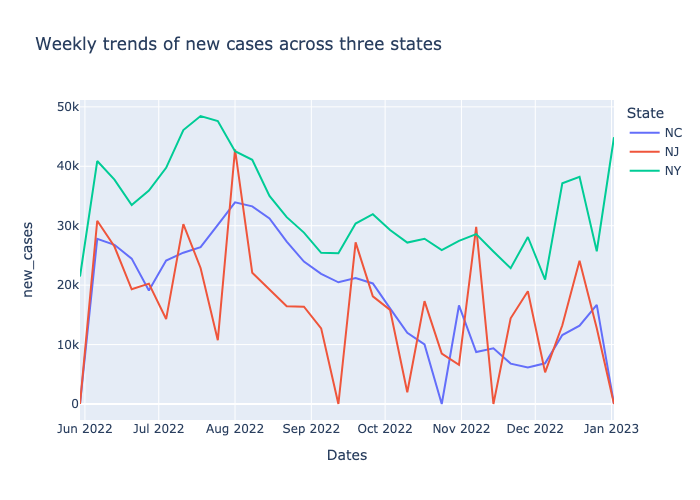

In [57]:
states_weekly_trends = px.line(selected_states_weekly1,x="Dates", y="new_cases", color="State",title = 'Weekly trends of new cases across three states')
#states_weekly_trends.show()
fig1 = states_weekly_trends.to_image(format="png")
Image(fig1)

From the above line plot of new_cases across three different states the new_cases registered across the new york (NY) state is high compared to other two states. The highest peak is in month of July 2022 for this NY state. For the NC state the highest peak occurred in the start of August 2022 and is almost decreasing in the remaining months. For the NJ state there were peaks in the month of August 2022 and there were some other peaks in the month of September 2022, November 2022 and December 2022. 

Apart from the selected three states CA state registered high number of new_cases and new_deaths in these months.

For the selected three states if we observe from the above line plot the new_cases registered are high in the months of June, July and August 2022 in each sate due to the omicron variant and also there is a decrease in the months of september, october due to second vaccination booster given to the people and again there is increase in the months of November and December due to public gatherings and holidays.

These peaks occurred in these states are consistent with the US pattern. We can cross check that from the fig1 of the team task

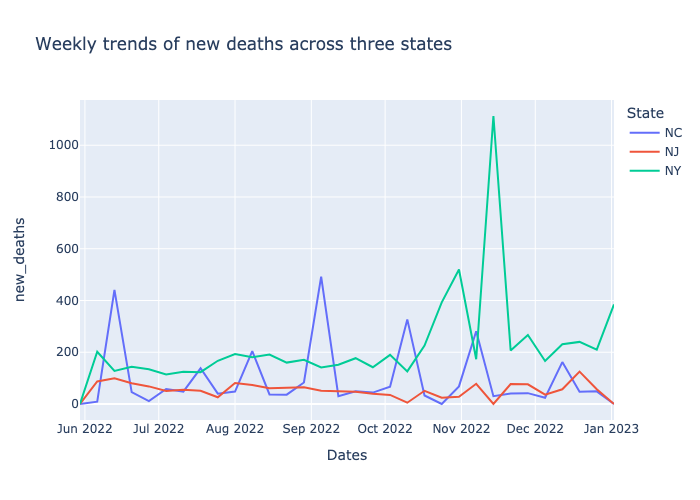

In [58]:
states_weekly_trends1 = px.line(selected_states_weekly1,x="Dates", y="new_deaths", color="State",title = 'Weekly trends of new deaths across three states')
#states_weekly_trends1.show()
fig2 = states_weekly_trends1.to_image(format="png")
Image(fig2)

From the above line plot of new_deaths across three different states the new_deaths registered across the North Carolina(NC) state is high in June 2022,September 2022 and there are normal peaks in remaining months. The new_deaths in New york state is high in the month of October 2022 and is almost constant in other months. The new_deaths registered acroos the New Jersey(NJ) state are very low when compared to other two states and the highest peak occurred in the month of the December 2022 

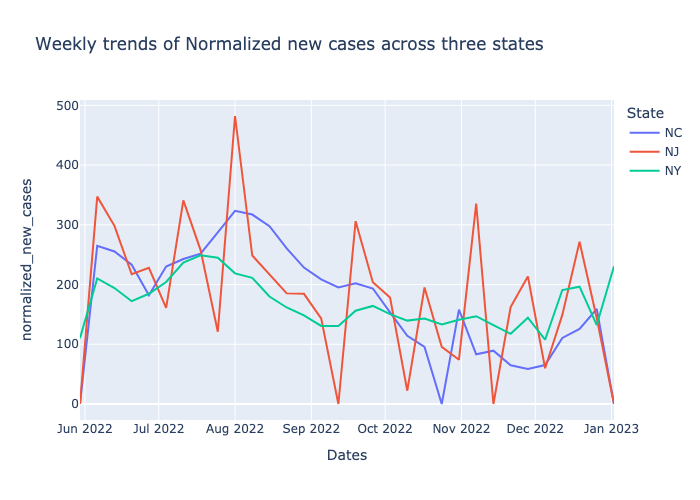

In [59]:
states_weekly_trends2 = px.line(selected_states_weekly1,x="Dates", y="normalized_new_cases", color="State",title = 'Weekly trends of Normalized new cases across three states')
#states_weekly_trends2.show()
fig3 = states_weekly_trends2.to_image(format="png")
Image(fig3)

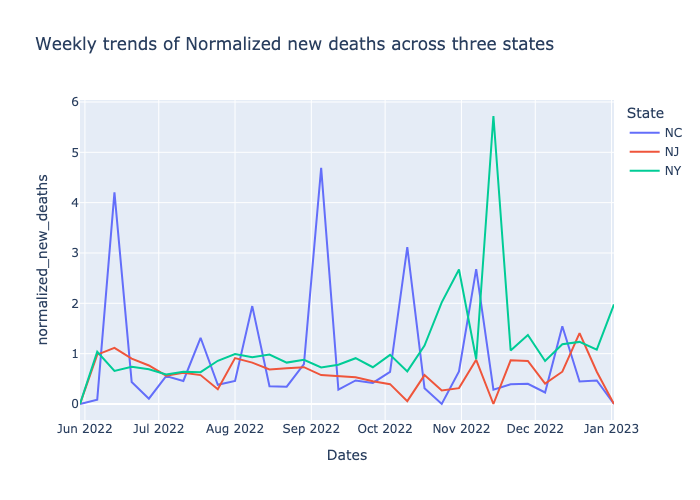

In [60]:
states_weekly_trends3 = px.line(selected_states_weekly1,x="Dates", y="normalized_new_deaths", color="State",title = 'Weekly trends of Normalized new deaths across three states')
#states_weekly_trends3.show()
fig4 = states_weekly_trends3.to_image(format="png")
Image(fig4)

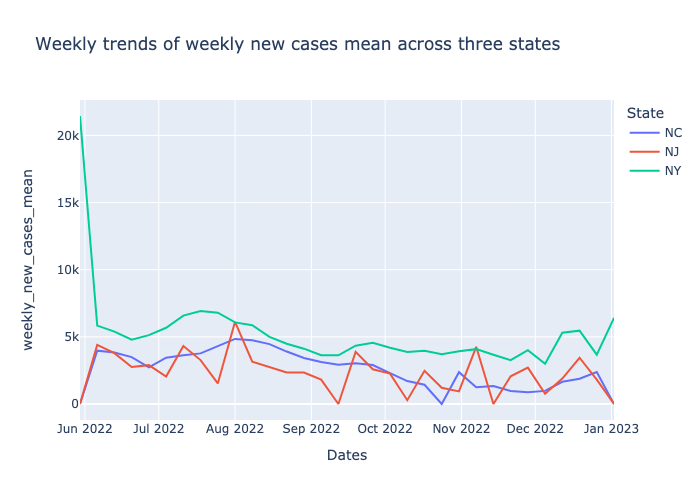

In [61]:
states_weekly_trends4 = px.line(selected_states_weekly1,x="Dates", y="weekly_new_cases_mean", color="State",title = 'Weekly trends of weekly new cases mean across three states')
#states_weekly_trends4.show()
fig5 = states_weekly_trends4.to_image(format="png")
Image(fig5)

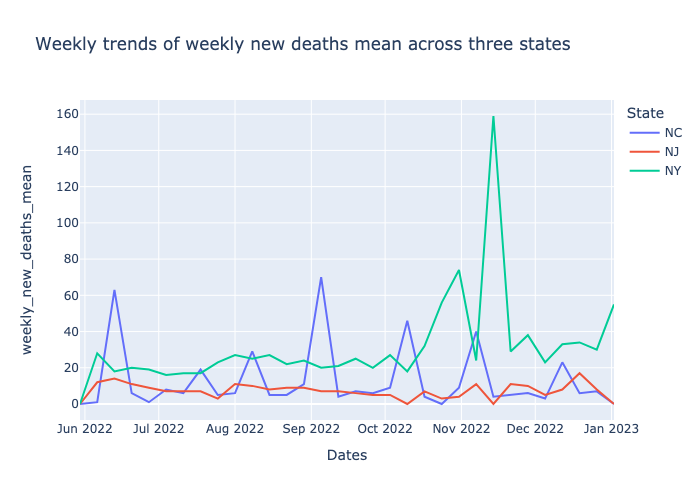

In [62]:
states_weekly_trends5 = px.line(selected_states_weekly1,x="Dates", y="weekly_new_deaths_mean", color="State",title = 'Weekly trends of weekly new deaths mean across three states')
#states_weekly_trends5.show()
fig6 = states_weekly_trends5.to_image(format="png")
Image(fig6)

### 3) Identify 3 counties within a state of your choice with high cases and death rates.

Separating the CA state data from the super covid-19 dataframe

In [63]:
ca_county_data = super_covid19_long[super_covid19_long['State']=='CA']
ca_county_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
202926,6001,Alameda County,CA,6,2020-01-22,4,0,1671329
202927,6001,Alameda County,CA,6,2020-01-23,4,0,1671329
202928,6001,Alameda County,CA,6,2020-01-24,4,0,1671329
202929,6001,Alameda County,CA,6,2020-01-25,5,0,1671329
202930,6001,Alameda County,CA,6,2020-01-26,5,0,1671329
...,...,...,...,...,...,...,...,...
266199,6115,Yuba County,CA,6,2023-01-12,19825,122,78668
266200,6115,Yuba County,CA,6,2023-01-13,19828,122,78668
266201,6115,Yuba County,CA,6,2023-01-14,19832,122,78668
266202,6115,Yuba County,CA,6,2023-01-15,19833,122,78668


Selecting the data from the date range of May 29th 2022 to Jan 2nd 2023

In [64]:
ca_county_data = ca_county_data[(ca_county_data['Dates'] >= '2022-05-29') & (ca_county_data['Dates'] < '2023-01-03')]
ca_county_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
203784,6001,Alameda County,CA,6,2022-05-29,284014,1863,1671329
203785,6001,Alameda County,CA,6,2022-05-30,284672,1870,1671329
203786,6001,Alameda County,CA,6,2022-05-31,285051,1870,1671329
203787,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
203788,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
...,...,...,...,...,...,...,...,...
266185,6115,Yuba County,CA,6,2022-12-29,19650,121,78668
266186,6115,Yuba County,CA,6,2022-12-30,19650,121,78668
266187,6115,Yuba County,CA,6,2022-12-31,19650,121,78668
266188,6115,Yuba County,CA,6,2023-01-01,19650,121,78668


Calculating the new_cases and new_deaths from cases and deaths columns using the diff() function.

In [65]:
ca_county_data['new_cases'] = ca_county_data['cases'].diff()
ca_county_data['new_deaths'] = ca_county_data['deaths'].diff()
ca_county_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population,new_cases,new_deaths
203784,6001,Alameda County,CA,6,2022-05-29,284014,1863,1671329,NaN,NaN
203785,6001,Alameda County,CA,6,2022-05-30,284672,1870,1671329,658.0,7.0
203786,6001,Alameda County,CA,6,2022-05-31,285051,1870,1671329,379.0,0.0
203787,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,658.0,0.0
203788,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
...,...,...,...,...,...,...,...,...,...,...
266185,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0
266186,6115,Yuba County,CA,6,2022-12-30,19650,121,78668,0.0,0.0
266187,6115,Yuba County,CA,6,2022-12-31,19650,121,78668,0.0,0.0
266188,6115,Yuba County,CA,6,2023-01-01,19650,121,78668,0.0,0.0


Removing the data from the dataframe related to the data May 29th 2022

In [66]:
ca_county_data= ca_county_data[ca_county_data['Dates']!= '2022-05-29']
ca_county_data

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population,new_cases,new_deaths
203785,6001,Alameda County,CA,6,2022-05-30,284672,1870,1671329,658.0,7.0
203786,6001,Alameda County,CA,6,2022-05-31,285051,1870,1671329,379.0,0.0
203787,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,658.0,0.0
203788,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
203789,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
266185,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0
266186,6115,Yuba County,CA,6,2022-12-30,19650,121,78668,0.0,0.0
266187,6115,Yuba County,CA,6,2022-12-31,19650,121,78668,0.0,0.0
266188,6115,Yuba County,CA,6,2023-01-01,19650,121,78668,0.0,0.0


In [67]:
ca_county_data.to_csv('../../../../data/Stage_2/selected_state_county_data_daily.csv', index = False)

Calculating the sum of the new_cases and new_deaths data grouping them by countyFIPS,County Name, StateFIPS, population columns by using groupby function()

In [68]:
ca_county_data1 = ca_county_data.groupby(['countyFIPS','County Name','StateFIPS','population']).sum().reset_index()
ca_county_data1.head()

,countyFIPS,County Name,StateFIPS,population,cases,deaths,new_cases,new_deaths
0,6001,Alameda County,6,1671329,73588071,434125,83933.0,229.0
1,6003,Alpine County,6,1129,29095,0,10.0,0.0
2,6005,Amador County,6,39752,2133029,19838,1526.0,9.0
3,6007,Butte County,6,219186,8390691,98539,6954.0,46.0
4,6009,Calaveras County,6,45905,1817091,28590,1316.0,15.0


Finding the high cases counties by sorting(Descending) the dataframe with new_cases column.

In [69]:
ca_county_data_highcases = ca_county_data1.sort_values(['new_cases'],ascending = False)
ca_county_data_highcases.head(3)

,countyFIPS,County Name,StateFIPS,population,cases,deaths,new_cases,new_deaths
18,6037,Los Angeles County,6,10039107,697945768,7215540,583584.0,2476.0
36,6073,San Diego County,6,3338330,196513598,1192900,171158.0,349.0
29,6059,Orange County,6,3175692,141870447,1606196,122126.0,624.0


Finding the high death rate counties by sorting(Descending) the dataframe with new_deaths column.

In [70]:
ca_county_data_highdeaths = ca_county_data1.sort_values(['new_deaths'],ascending = False)
ca_county_data_highdeaths.head(3)

,countyFIPS,County Name,StateFIPS,population,cases,deaths,new_cases,new_deaths
18,6037,Los Angeles County,6,10039107,697945768,7215540,583584.0,2476.0
29,6059,Orange County,6,3175692,141870447,1606196,122126.0,624.0
35,6071,San Bernardino County,6,2180085,142192958,1738867,115638.0,514.0


### 4) Plot weekly trends (new cases and deaths) for the top 3 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

Separating the data of the top3 infected counties(which we found in the third point) from the ca_county_data dataframe 

In [71]:
top3_infected_county = ca_county_data[ca_county_data['countyFIPS'].isin([6037,6073,6059])]
top3_infected_county

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population,new_cases,new_deaths
223423,6037,Los Angeles County,CA,6,2022-05-30,2841989,31893,10039107,5454.0,13.0
223424,6037,Los Angeles County,CA,6,2022-05-31,2843393,31895,10039107,1404.0,2.0
223425,6037,Los Angeles County,CA,6,2022-06-01,2846542,31896,10039107,3149.0,1.0
223426,6037,Los Angeles County,CA,6,2022-06-02,2846726,31896,10039107,184.0,0.0
223427,6037,Los Angeles County,CA,6,2022-06-03,2846726,31896,10039107,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
243274,6073,San Diego County,CA,6,2022-12-29,962601,5641,3338330,0.0,0.0
243275,6073,San Diego County,CA,6,2022-12-30,962601,5641,3338330,0.0,0.0
243276,6073,San Diego County,CA,6,2022-12-31,962601,5641,3338330,0.0,0.0
243277,6073,San Diego County,CA,6,2023-01-01,962601,5641,3338330,0.0,0.0


In [72]:
top3_infected_county['new_cases'].clip(lower=0, inplace = True) #Clipping new_cases to zero
top3_infected_county['new_deaths'].clip(lower=0, inplace = True) #Clipping new_deaths to zero

In [73]:
n_counties = top3_infected_county['County Name'].value_counts() #Value counts of the County Name column

In [74]:
county_list = top3_infected_county['County Name'].tolist() #Taking the County Name column into a list
county_weekly = states_week_data(top3_infected_county,county_list,n_counties)#Appending the county name as many number of times of the number of weeks


In [75]:
county_dates_list = top3_infected_county['Dates'].tolist() #Taking the Dates column into a list
county_dates_weekly = states_week_data(top3_infected_county,dates_list,n_counties) #Calculating the weekly dates using the function states_week_data

In [76]:
county_population_list = top3_infected_county['population'].tolist() #Taking population column into a list
county_population_weekly = states_week_data(top3_infected_county,county_population_list,n_counties) #Appending the population of counties as many number of times as number of weeks


In [77]:
county_new_cases_list = top3_infected_county['new_cases'].tolist() #Taking new_cases column of County's into a list
county_new_cases_weekly = states_weekly_cases_deaths_data(top3_infected_county,county_new_cases_list,n_counties) #Calculating the weekly sum of new cases for counties using the function states_weekly_cases_deaths_data


In [78]:
county_new_deaths_list = top3_infected_county['new_deaths'].tolist() #Taking the new_deaths column of County's data into a list
county_new_deaths_weekly = states_weekly_cases_deaths_data(top3_infected_county,county_new_deaths_list,n_counties)#Calculating the weekly sum of new deaths for counties using the function states_weekly_cases_deaths_data

Creating a county_top3_data_weekly dataframe which contains County Names(top3), Weekly dates, sum of weekly new_cases, new_deaths and population of each county

In [79]:
county_top3_data_weekly = pd.DataFrame({'County Name':county_weekly,'Dates':county_dates_weekly,'new_cases':county_new_cases_weekly,'new_deaths':county_new_deaths_weekly,'population':county_population_weekly})
county_top3_data_weekly

,County Name,Dates,new_cases,new_deaths,population
0,Los Angeles County,2022-05-30,5454.0,13.0,10039107
1,Los Angeles County,2022-06-06,23650.0,25.0,10039107
2,Los Angeles County,2022-06-13,31395.0,51.0,10039107
3,Los Angeles County,2022-06-20,34432.0,63.0,10039107
4,Los Angeles County,2022-06-27,23769.0,28.0,10039107
...,...,...,...,...,...
91,San Diego County,2022-12-05,5746.0,15.0,3338330
92,San Diego County,2022-12-12,202.0,0.0,3338330
93,San Diego County,2022-12-19,9914.0,56.0,3338330
94,San Diego County,2022-12-26,4377.0,1.0,3338330


Calculating the normalized_new_cases, normalized_new_deaths using the new_cases, new_deaths and population columns of the county_top3_data_weekly dataframe

In [80]:
county_top3_data_weekly['normalized_new_cases'] = (county_top3_data_weekly['new_cases']/county_top3_data_weekly['population'])*10000
county_top3_data_weekly['normalized_new_deaths'] = (county_top3_data_weekly['new_deaths']/county_top3_data_weekly['population'])*10000
county_top3_data_weekly

,County Name,Dates,new_cases,new_deaths,population,normalized_new_cases,normalized_new_deaths
0,Los Angeles County,2022-05-30,5454.0,13.0,10039107,5.432754,0.012949
1,Los Angeles County,2022-06-06,23650.0,25.0,10039107,23.557872,0.024903
2,Los Angeles County,2022-06-13,31395.0,51.0,10039107,31.272702,0.050801
3,Los Angeles County,2022-06-20,34432.0,63.0,10039107,34.297871,0.062755
4,Los Angeles County,2022-06-27,23769.0,28.0,10039107,23.676409,0.027891
...,...,...,...,...,...,...,...
91,San Diego County,2022-12-05,5746.0,15.0,3338330,17.212199,0.044933
92,San Diego County,2022-12-12,202.0,0.0,3338330,0.605093,0.000000
93,San Diego County,2022-12-19,9914.0,56.0,3338330,29.697483,0.167749
94,San Diego County,2022-12-26,4377.0,1.0,3338330,13.111346,0.002996


Calculating log_normalized_new_cases and log_normalized_new_deaths columns by applying log(using numpy library )on the normalized_new_cases and normalized_new_deaths columns

In [81]:
county_top3_data_weekly['log_normalized_new_cases'] = np.log(county_top3_data_weekly['normalized_new_cases'])
county_top3_data_weekly['log_normalized_new_deaths'] = np.log(county_top3_data_weekly['normalized_new_deaths'])
county_top3_data_weekly

,County Name,Dates,new_cases,new_deaths,population,normalized_new_cases,normalized_new_deaths,log_normalized_new_cases,log_normalized_new_deaths
0,Los Angeles County,2022-05-30,5454.0,13.0,10039107,5.432754,0.012949,1.692446,-4.346709
1,Los Angeles County,2022-06-06,23650.0,25.0,10039107,23.557872,0.024903,3.159460,-3.692783
2,Los Angeles County,2022-06-13,31395.0,51.0,10039107,31.272702,0.050801,3.442746,-2.979833
3,Los Angeles County,2022-06-20,34432.0,63.0,10039107,34.297871,0.062755,3.535083,-2.768524
4,Los Angeles County,2022-06-27,23769.0,28.0,10039107,23.676409,0.027891,3.164479,-3.579454
...,...,...,...,...,...,...,...,...,...
91,San Diego County,2022-12-05,5746.0,15.0,3338330,17.212199,0.044933,2.845618,-3.102591
92,San Diego County,2022-12-12,202.0,0.0,3338330,0.605093,0.000000,-0.502373,-inf
93,San Diego County,2022-12-19,9914.0,56.0,3338330,29.697483,0.167749,3.391062,-1.785289
94,San Diego County,2022-12-26,4377.0,1.0,3338330,13.111346,0.002996,2.573478,-5.810641


Plotting the line plots of weekly trends of the top3 infected counties by using the plotly express library

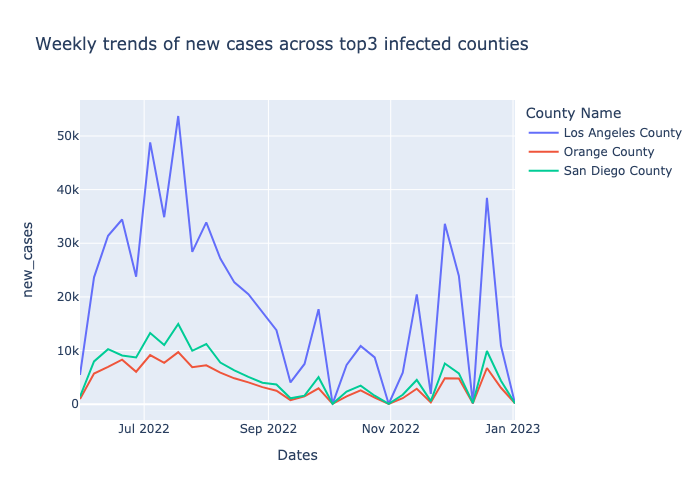

In [82]:
county_weekly_trends1 = px.line(county_top3_data_weekly,x = 'Dates',y= 'new_cases', color = 'County Name', title = 'Weekly trends of new cases across top3 infected counties')
#county_weekly_trends1.show()
fig7 = county_weekly_trends1.to_image(format="png")
Image(fig7)

From the above line plot of new_cases across the three counties the new_cases registered are high in the months of June, July 2022. There was decrease in the months of August and September and there was again some peaks in the months of November and December 2022. There was increase in the new_cases in the months of June, July in all these counties is due to increase in omicron variant. And there was increase in months of November and december due to the thanks giving and christmas happened as there may be more public gatherings. All these three counties follows the California State pattern of new_cases. We can see that from the plot of CA state in the fig13.

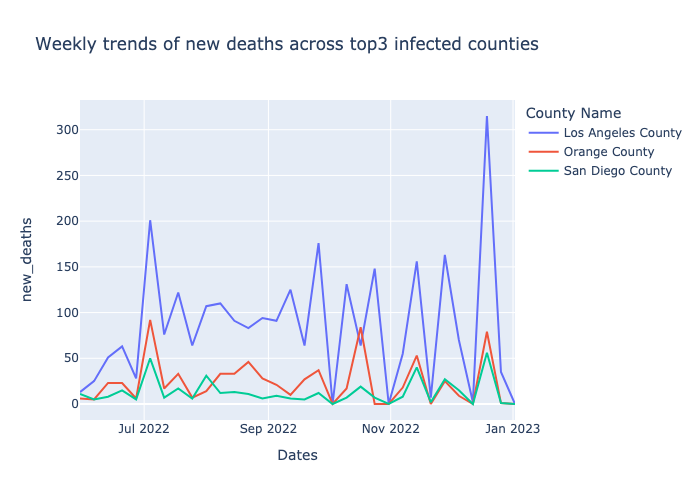

In [83]:
county_weekly_trends2 = px.line(county_top3_data_weekly,x = 'Dates',y= 'new_deaths', color = 'County Name', title = 'Weekly trends of new deaths across top3 infected counties')
#county_weekly_trends2.show()
fig8 = county_weekly_trends2.to_image(format="png")
Image(fig8)

From the above line plot of new_deaths across the three counties the new_deaths registered are high in the months of July 2022. They were constant in the months of August and September and there was again some peaks in the months of December 2022. There was increase in the new_deaths in the months of June, July in all these counties is due to increase in omicron variant and lack of taking the booster doses. And there was increase in months of November and december due to the thanks giving and christmas happened as there will be more gatherings. All these three counties follows the California State pattern of new_deaths. We can see that from the plot of CA state in the fig14.

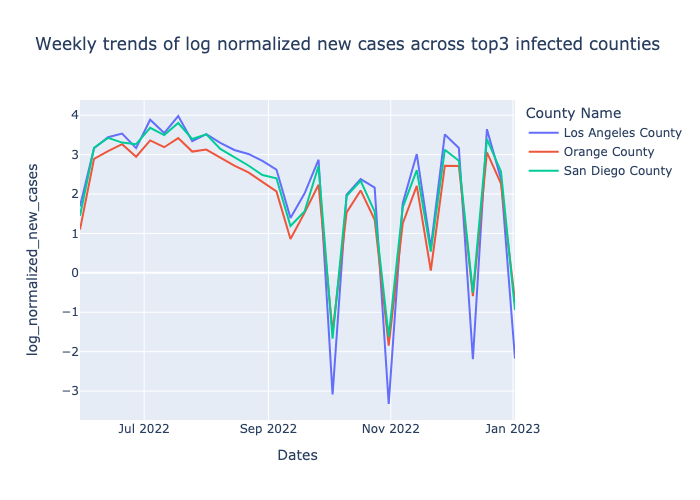

In [84]:
county_weekly_trends3 = px.line(county_top3_data_weekly,x = 'Dates',y= 'log_normalized_new_cases', color = 'County Name', title = 'Weekly trends of log normalized new cases across top3 infected counties')
#county_weekly_trends3.show()
fig9 = county_weekly_trends3.to_image(format="png")
Image(fig9)

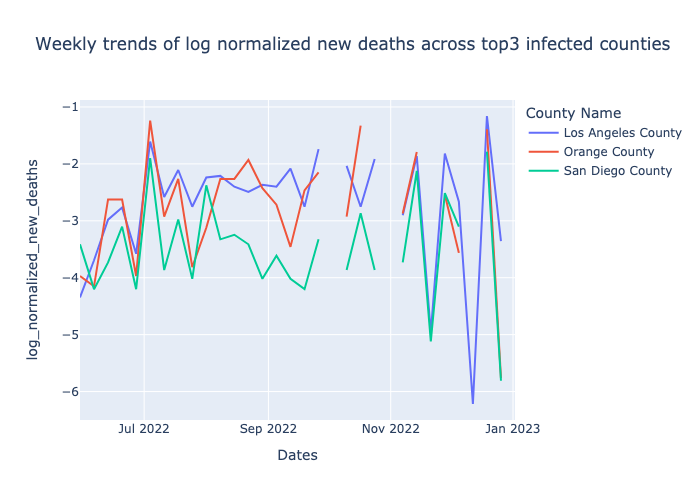

In [85]:
county_weekly_trends4 = px.line(county_top3_data_weekly,x = 'Dates',y= 'log_normalized_new_deaths', color = 'County Name', title = 'Weekly trends of log normalized new deaths across top3 infected counties')
#county_weekly_trends4.show()
fig10 = county_weekly_trends4.to_image(format="png")
Image(fig10)

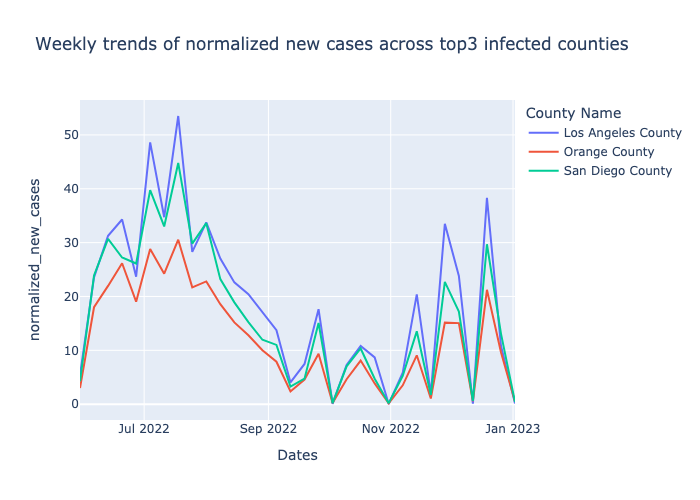

In [86]:
county_weekly_trends5 = px.line(county_top3_data_weekly,x = 'Dates',y= 'normalized_new_cases', color = 'County Name', title = 'Weekly trends of normalized new cases across top3 infected counties')
#county_weekly_trends5.show()
fig11 = county_weekly_trends5.to_image(format="png")
Image(fig11)

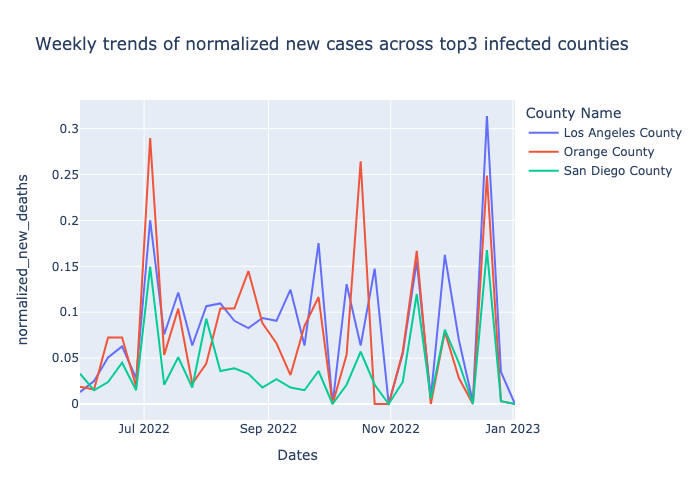

In [87]:
county_weekly_trends6 = px.line(county_top3_data_weekly,x = 'Dates',y= 'normalized_new_deaths', color = 'County Name', title = 'Weekly trends of normalized new cases across top3 infected counties')
#county_weekly_trends6.show()
fig12 = county_weekly_trends6.to_image(format="png")
Image(fig12)

In [88]:
selected_states_weekly2 = selected_states_weekly[selected_states_weekly['State']=='CA']
selected_states_weekly2

,State,Dates,new_cases,new_deaths,population,weekly_new_cases_mean,weekly_new_deaths_mean,weekly_new_cases_median,weekly_new_deaths_median,weekly_new_cases_mode,weekly_new_deaths_mode,normalized_new_cases,normalized_new_deaths
0,CA,2022-05-30,16380.0,90.0,39512223,16380,90,16380,90,0.0,0.0,41.455526,0.227778
1,CA,2022-06-06,87753.0,78.0,39512223,12536,11,1798,0,0.0,0.0,222.090769,0.197407
2,CA,2022-06-13,110405.0,216.0,39512223,15772,30,0,0,0.0,0.0,279.419865,0.546666
3,CA,2022-06-20,117746.0,305.0,39512223,16820,43,8637,4,27525.0,127.0,297.998926,0.771913
4,CA,2022-06-27,90231.0,105.0,39512223,12890,15,10147,1,14015.0,0.0,228.362246,0.265741
5,CA,2022-07-04,159859.0,972.0,39512223,22837,138,17789,35,0.0,0.0,404.581134,2.459998
6,CA,2022-07-11,114205.0,240.0,39512223,16315,34,20082,41,9866.0,43.0,289.037142,0.607407
7,CA,2022-07-18,156248.0,397.0,39512223,22321,56,10948,8,0.0,0.0,395.442190,1.004752
8,CA,2022-07-25,95632.0,137.0,39512223,13661,19,10009,1,17856.0,0.0,242.031434,0.346728
9,CA,2022-08-01,110489.0,290.0,39512223,15784,41,10608,0,0.0,0.0,279.632457,0.733950


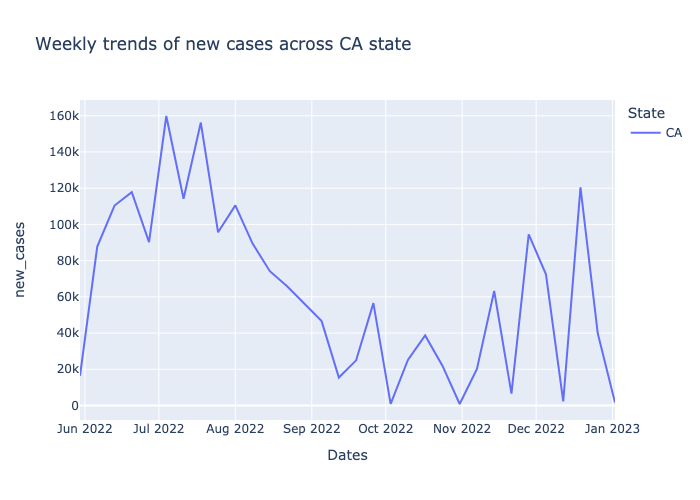

In [89]:
states_weekly_trends6 = px.line(selected_states_weekly2,x="Dates", y="new_cases", color="State",title = 'Weekly trends of new cases across CA state')
#states_weekly_trends6.show()
fig13 = states_weekly_trends6.to_image(format="png")
Image(fig13)

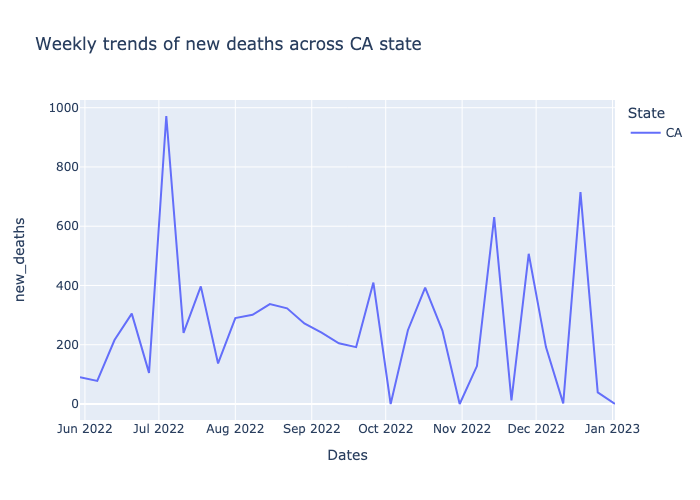

In [90]:
states_weekly_trends7 = px.line(selected_states_weekly2,x="Dates", y="new_deaths",color = 'State', title = 'Weekly trends of new deaths across CA state')
#states_weekly_trends7.show()
fig14 = states_weekly_trends7.to_image(format="png")
Image(fig14)

References:

- https://stackoverflow.com/questions/13114512/calculating-difference-between-two-rows-in-python-pandas

- https://stackoverflow.com/questions/45281297/group-by-week-in-pandas

- https://sparkbyexamples.com/pandas/pandas-select-dataframe-rows-based-on-column-values/

- https://plotly.com/python/line-charts/